In [2]:
from matplotlib import pyplot as plt
import pyodbc
import pandas as pd
import numpy as np
import seaborn as sns

conn = pyodbc.connect('Driver={SQL Server};'
                        'Server=DESKTOP-SF0773P;'
                        'Database=AdventureWorks2019;'
                        'Trusted_Connection=yes;')
 


Importing the relevant Python modules we will be using to answer the question.. and also connecting to the SQL server instance and linking the appropriate database (AdventureWorks2019).

Q6: What is the relationship between store trading duration and revenue?

To answer this question regarding the data from AdventureWorks2019, we must consider which data we need to import into the Jupyter Notebook to visualise with Python. The relevant data to answer this question is 'YearOpened' and 'AnnualRevenue', both of which can be found in the view 'Sales.vStoreWithDemographics'


In [3]:
df = pd.read_sql_query('SELECT * FROM Sales.vStoreWithDemographics', conn) 

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


It is now time to visualise the data: something important to note when looking through the view on SQLServer is that a lot of the data contains the exact same values, thus it is a good idea to make use of the matploblib feature 'alpha', which allows for a transparency factor to be added to each datapoint. 

<AxesSubplot:xlabel='YearOpened', ylabel='AnnualRevenue'>

<Figure size 432x288 with 0 Axes>

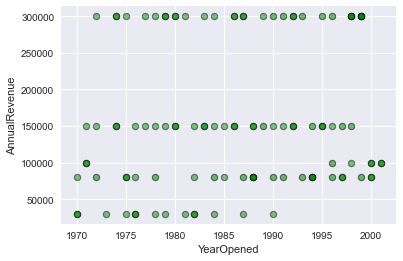

In [4]:
plt.style.use('seaborn')
plt.tight_layout()
df.plot.scatter(x='YearOpened',y='AnnualRevenue',s=40,c='green', edgecolor='black', linewidth=1, alpha=0.1) 


As we can see from the scatter plot above showing the data of annual revenue for each store against the year that each store opened, there is no direct correlation between the two. Stores that have opened recently can achieve high values of revenue and vice versa, this is found similarly with stores opened decades ago.

In [5]:
correlation = df.corr()
print(correlation)

                  BusinessEntityID  AnnualSales  AnnualRevenue  YearOpened  \
BusinessEntityID          1.000000    -0.042012      -0.042012    0.004048   
AnnualSales              -0.042012     1.000000       1.000000    0.133645   
AnnualRevenue            -0.042012     1.000000       1.000000    0.133645   
YearOpened                0.004048     0.133645       0.133645    1.000000   
SquareFeet               -0.037011     0.996531       0.996531    0.123439   
NumberEmployees          -0.031114     0.958107       0.958107    0.084813   

                  SquareFeet  NumberEmployees  
BusinessEntityID   -0.037011        -0.031114  
AnnualSales         0.996531         0.958107  
AnnualRevenue       0.996531         0.958107  
YearOpened          0.123439         0.084813  
SquareFeet          1.000000         0.971782  
NumberEmployees     0.971782         1.000000  


Above we can see the correlation values for each relationship in our dataframe. For year opened and annual revenue, we can see the correlation is very low (0.133635) unlike some other metrics such as sq footage of the store and it's annual revenue which is highly correlated with a value of 0.996531.